# Import libraries and setup

In [41]:

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import warnings
warnings.filterwarnings('ignore')

print("Current directory:", os.getcwd())
print("\nFiles in current directory:")
for item in os.listdir('.'):
    print(f"  - {item}")


Current directory: /Users/slk/Desktop/emotion_activation_maps_project

Files in current directory:
  - test_images
  - model_evaluation.py
  - activation_maps_output
  - Untitled1.ipynb
  - .DS_Store
  - requirements.txt
  - test
  - emotion_detection_model.h5
  - Untitled.ipynb
  - model_training.py
  - read.md
  - activation_maps.py
  - models
  - __pycache__
  - .gitignore
  - train
  - .ipynb_checkpoints
  - sample_emotion.jpg
  - data_preparation.py
  - cnn_activation_analysis.png
  - notebooks
  - activation_maps
  - src


#  Load the trained model

In [46]:
model_path = 'emotion_detection_model.h5'

try:
    model = keras.models.load_model(model_path)
    print("✓ Model loaded successfully!")
    model.summary()
except Exception as e:
    print(f"Error loading model: {e}")

✓ Model loaded successfully!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,913 (2.36 MB)

 Trainable params: 619,463 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

# Explore the rain and test folders

In [49]:

def explore_data_folders():
    
    if os.path.exists('train'):
        print("TRAINING DATA:")
        train_emotions = os.listdir('train')
        for emotion in train_emotions:
            if os.path.isdir(os.path.join('train', emotion)):
                count = len(os.listdir(os.path.join('train', emotion)))
                print(f"  {emotion}: {count} images")
    
    if os.path.exists('test'):
        print("\nTEST DATA:")
        test_emotions = os.listdir('test')
        for emotion in test_emotions:
            if os.path.isdir(os.path.join('test', emotion)):
                count = len(os.listdir(os.path.join('test', emotion)))
                print(f"  {emotion}: {count} images")
    
    return train_emotions if 'train_emotions' in locals() else []

emotion_classes = explore_data_folders()

TRAINING DATA:
  happy: 7215 images
  sad: 4830 images
  fearful: 4097 images
  neutral: 4965 images
  angry: 3995 images
  disgusted: 436 images
  surprised: 3171 images

TEST DATA:
  happy: 1774 images
  sad: 1247 images
  fearful: 1024 images
  neutral: 1233 images
  angry: 958 images
  disgusted: 111 images
  surprised: 831 images


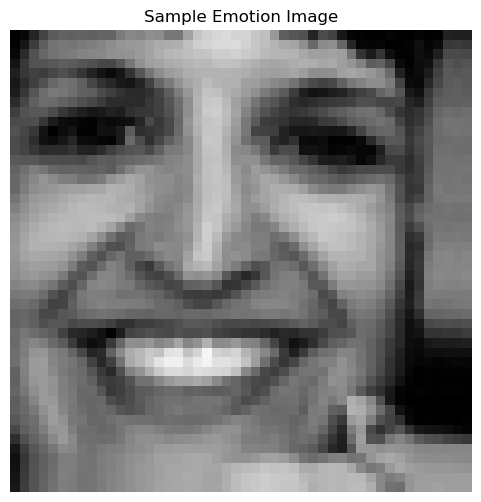

Image shape: (48, 48, 3)
Model input shape: (None, 48, 48, 1)


In [51]:
sample_image_path = 'sample_emotion.jpg'

# Display the sample image
img = cv2.imread(sample_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb, cmap='gray' if len(img.shape) == 2 else None)
plt.title('Sample Emotion Image')
plt.axis('off')
plt.show()

print(f"Image shape: {img.shape}")
print(f"Model input shape: {model.input_shape}")

# Activation Map Visualization Functions (Fixed)

Found 3 convolutional layers


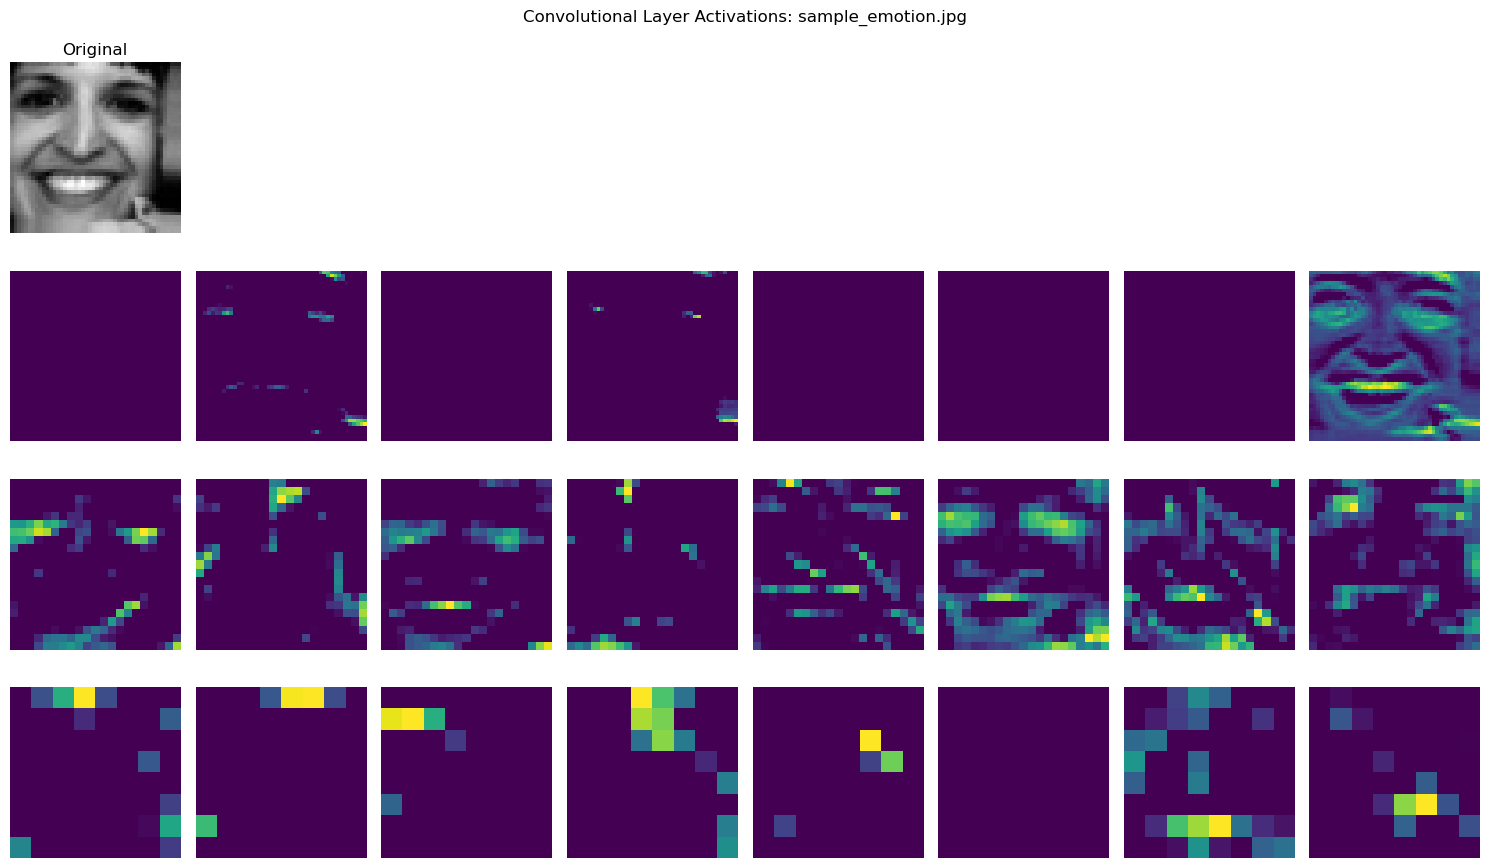

In [20]:
def preprocess_image(image_path, target_size=(48, 48)):

    img = cv2.imread(image_path)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img, target_size)
    img_array = img_resized.reshape(1, target_size[0], target_size[1], 1)
    img_normalized = img_array / 255.0
    
    return img_normalized, img_resized


def build_model_if_needed(model):
    try:
        _ = model.input_shape
    except AttributeError:
        print("Building model...")
        dummy_input = tf.zeros((1, 48, 48, 1))
        _ = model(dummy_input)
        print("Model built successfully!")
    return model

# Build the model
model = build_model_if_needed(model)

def visualize_conv_layers(model, image_path):

    try:
        input_shape = model.input_shape[1:3]
    except:
        input_shape = (48, 48)  # Default size, adjust if needed
        print(f"Using default input shape: {input_shape}")
    
    img_array, img_original = preprocess_image(image_path, target_size=input_shape)
    
    # Get all conv layers
    conv_layers = []
    for layer in model.layers:
        if 'conv' in layer.name.lower():
            conv_layers.append(layer)
        elif hasattr(layer, 'layers'):
            for sublayer in layer.layers:
                if 'conv' in sublayer.name.lower():
                    conv_layers.append(sublayer)
    
    if not conv_layers:
        print("No convolutional layers found!")
        return None
    
    print(f"Found {len(conv_layers)} convolutional layers")
    
    # Create figure
    fig = plt.figure(figsize=(15, 3 * len(conv_layers)))
    
    # Show original image
    plt.subplot(len(conv_layers) + 1, 8, 1)
    plt.imshow(img_original, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    for layer_idx, conv_layer in enumerate(conv_layers):
        intermediate_model = tf.keras.Model(
            inputs=model.inputs,
            outputs=conv_layer.output
        )
        
        activations = intermediate_model.predict(img_array, verbose=0)
        
        n_filters = min(8, activations.shape[-1])
        for i in range(n_filters):
            plt.subplot(len(conv_layers) + 1, 8, (layer_idx + 1) * 8 + i + 1)
            plt.imshow(activations[0, :, :, i], cmap='viridis')
            if i == 0:
                plt.ylabel(conv_layer.name, rotation=90)
            plt.axis('off')
    
    plt.suptitle(f'Convolutional Layer Activations: {os.path.basename(image_path)}')
    plt.tight_layout()
    return fig


fig = visualize_conv_layers(model, sample_image_path)
if fig:
    plt.show()

# Simple activation heatmap with proper error handling

Checking model output shape...
Model output shape: (1, 7)
Number of emotion classes in model: 7
Using emotion labels: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
Model outputs 7 classes


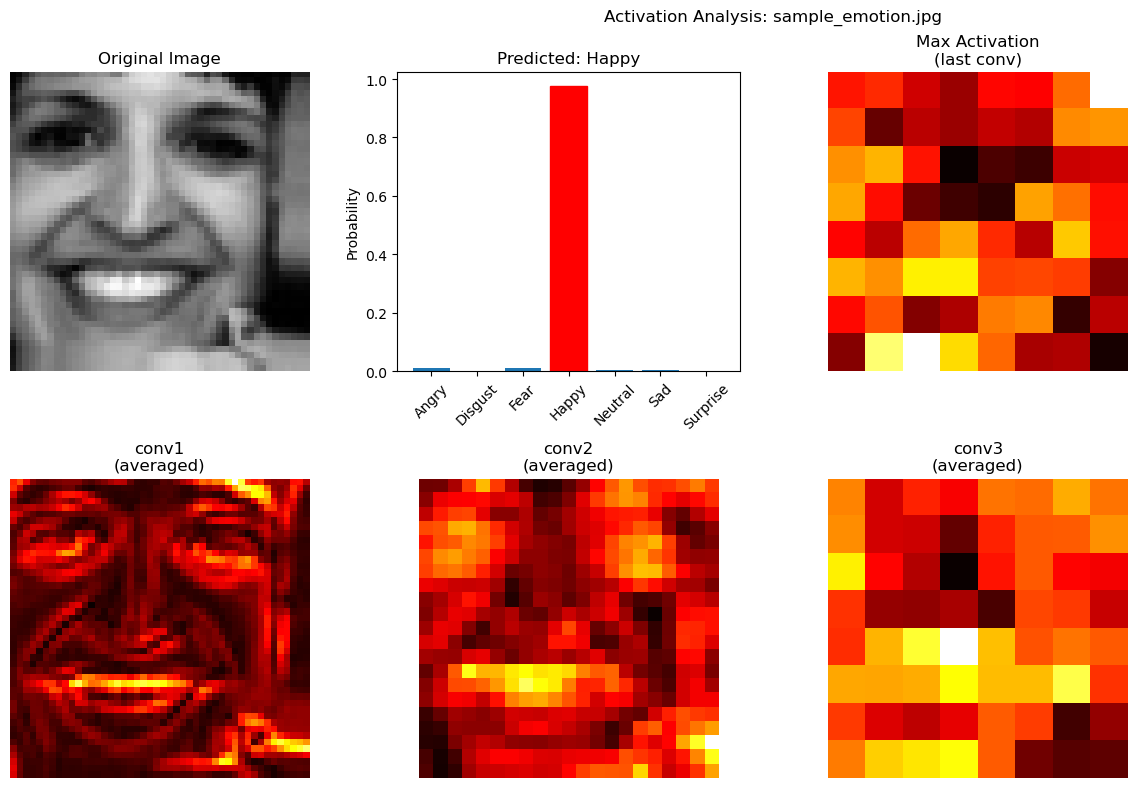

In [28]:
def create_simple_activation_heatmap(model, image_path, emotion_labels=None):
    """Create a simple activation heatmap visualization"""
    
    img = cv2.imread(image_path)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_resized = cv2.resize(img, (48, 48))
    img_array = img_resized.reshape(1, 48, 48, 1) / 255.0
    
    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions[0])
    
    num_classes = predictions.shape[1]
    print(f"Model outputs {num_classes} classes")

    if emotion_labels is None:
        emotion_labels = [f"Class_{i}" for i in range(num_classes)]
    else:

        if len(emotion_labels) != num_classes:
            print(f"Warning: Provided {len(emotion_labels)} labels but model outputs {num_classes} classes")
            if len(emotion_labels) > num_classes:
                emotion_labels = emotion_labels[:num_classes]
            else:
                emotion_labels = emotion_labels + [f"Class_{i}" for i in range(len(emotion_labels), num_classes)]
    
    conv_outputs = []
    for layer in model.layers:
        if 'conv' in layer.name.lower():
            try:
                activation_model = tf.keras.Model(inputs=model.inputs, outputs=layer.output)
                activation = activation_model.predict(img_array, verbose=0)
                conv_outputs.append((layer.name, activation))
            except:
                pass
    
    fig = plt.figure(figsize=(16, 8))
   
    plt.subplot(2, 4, 1)
    plt.imshow(img_resized, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 4, 2)
    bars = plt.bar(range(num_classes), predictions[0])
    if predicted_class < len(bars):
        bars[predicted_class].set_color('red')
    plt.xticks(range(num_classes), emotion_labels, rotation=45)
    plt.title(f'Predicted: {emotion_labels[predicted_class]}')
    plt.ylabel('Probability')
    
    if conv_outputs:
        for idx, (layer_name, activation) in enumerate(conv_outputs[-3:]):  # Last 3 conv layers
            if idx < 3:
                avg_activation = np.mean(activation[0], axis=-1)
                
                plt.subplot(2, 4, 5 + idx)
                plt.imshow(avg_activation, cmap='hot')
                plt.title(f'{layer_name}\n(averaged)')
                plt.axis('off')
                
                max_activation = np.max(activation[0], axis=-1)
                
                plt.subplot(2, 4, 3)
                plt.imshow(max_activation, cmap='hot')
                plt.title('Max Activation\n(last conv)')
                plt.axis('off')
    
    plt.suptitle(f'Activation Analysis: {os.path.basename(image_path)}')
    plt.tight_layout()
    return fig

print("Checking model output shape...")
dummy_input = np.zeros((1, 48, 48, 1))
test_output = model.predict(dummy_input, verbose=0)
print(f"Model output shape: {test_output.shape}")
print(f"Number of emotion classes in model: {test_output.shape[1]}")

# Define emotion labels based on model output
if test_output.shape[1] == 7:
    emotion_labels_correct = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
elif test_output.shape[1] == 8:
    # 8 emotions (might include Contempt)
    emotion_labels_correct = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
else:
    emotion_labels_correct = [f"Emotion_{i}" for i in range(test_output.shape[1])]

print(f"Using emotion labels: {emotion_labels_correct}")

# Try the visualization with corrected labels
fig = create_simple_activation_heatmap(model, sample_image_path, emotion_labels_correct)
plt.show()

# Process multiple test images

In [30]:
def process_test_images(model, test_folder='test', num_images_per_class=2):
    """Process images from your test folder"""
    
    results_dir = 'activation_maps_output'
    os.makedirs(results_dir, exist_ok=True)
    
    emotion_folders = [f for f in os.listdir(test_folder) 
                      if os.path.isdir(os.path.join(test_folder, f))]
    
    print(f"Found emotions: {emotion_folders}")
    
    for emotion in emotion_folders:
        emotion_path = os.path.join(test_folder, emotion)
        image_files = [f for f in os.listdir(emotion_path) 
                      if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        print(f"\nProcessing {emotion} images ({len(image_files)} total)...")
        
        for i, img_file in enumerate(image_files[:num_images_per_class]):
            img_path = os.path.join(emotion_path, img_file)
            print(f"  - {img_file}")
            
            fig1 = visualize_conv_layers(model, img_path)
            fig1.savefig(os.path.join(results_dir, f'{emotion}_{i}_activations.png'), 
                        dpi=150, bbox_inches='tight')
            plt.close(fig1)
            
            fig2 = create_gradcam_visualization(model, img_path, emotion_folders)
            fig2.savefig(os.path.join(results_dir, f'{emotion}_{i}_gradcam.png'), 
                        dpi=150, bbox_inches='tight')
            plt.close(fig2)
    
    print(f"\nResults saved to {results_dir}/")
    
process_test_images(model, 'test', num_images_per_class=3)

Found emotions: ['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

Processing happy images (1774 total)...
  - im771.png
Found 3 convolutional layers
Using last conv layer: conv3
Error generating heatmap: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.
  - im765.png
Found 3 convolutional layers
Using last conv layer: conv3
Error generating heatmap: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.
  - im1209.png
Found 3 convolutional layers
Using last conv layer: conv3
Error generating heatmap: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

Processing sad images (1247 total)...
  - im771.png
Found 3 convolutional layers
Using last conv layer: conv3
Error generating heatmap: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.
  - im765.png
Found 3 convolutional layers
Using last conv layer:

In [32]:
# Cell 1: Import required libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import pandas as pd

# Evaluate model on test data

In [34]:
def evaluate_model(model, test_folder='test'):
    """Evaluate model performance on test data"""
    

    emotion_classes = sorted([f for f in os.listdir(test_folder) 
                             if os.path.isdir(os.path.join(test_folder, f))])
    
    print(f"Found {len(emotion_classes)} emotion classes: {emotion_classes}")
    
    y_true = []
    y_pred = []
    y_pred_proba = []
    
    for true_label_idx, emotion in enumerate(emotion_classes):
        emotion_path = os.path.join(test_folder, emotion)
        image_files = [f for f in os.listdir(emotion_path) 
                      if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        print(f"\nProcessing {emotion}: {len(image_files)} images")
        
        for img_file in image_files:
            img_path = os.path.join(emotion_path, img_file)
            
            img = cv2.imread(img_path)
            if img is None:
                continue
                
            if len(img.shape) == 3:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            img_resized = cv2.resize(img, (48, 48))
            img_array = img_resized.reshape(1, 48, 48, 1) / 255.0
        
            predictions = model.predict(img_array, verbose=0)
            predicted_class = np.argmax(predictions[0])
            
            y_true.append(true_label_idx)
            y_pred.append(predicted_class)
            y_pred_proba.append(predictions[0])
    

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_proba = np.array(y_pred_proba)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    # Get classification report
    report = classification_report(y_true, y_pred, 
                                 target_names=emotion_classes[:len(set(y_pred))],
                                 output_dict=True)
    
    print("\n" + "="*50)
    print("EVALUATION RESULTS")
    print("="*50)
    print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Total test samples: {len(y_true)}")
    
    return {
        'y_true': y_true,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'report': report,
        'emotion_classes': emotion_classes
    }

# Run evaluation
results = evaluate_model(model, 'test')

Found 7 emotion classes: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

Processing angry: 958 images

Processing disgusted: 111 images

Processing fearful: 1024 images

Processing happy: 1774 images

Processing neutral: 1233 images

Processing sad: 1247 images

Processing surprised: 831 images

EVALUATION RESULTS

Overall Accuracy: 0.5619 (56.19%)
Total test samples: 7178


# Display detailed classification report

In [36]:
def display_classification_report(results):
    """Display detailed classification report with precision, recall, F1"""
    
    report = results['report']
    emotion_classes = results['emotion_classes']
    
    metrics_data = []
    
    for i, emotion in enumerate(emotion_classes):
        if str(i) in report or emotion in report:
            key = emotion if emotion in report else str(i)
            if key in report:
                metrics_data.append({
                    'Emotion': emotion,
                    'Precision': report[key]['precision'],
                    'Recall': report[key]['recall'],
                    'F1-Score': report[key]['f1-score'],
                    'Support': report[key]['support']
                })
    
    df_metrics = pd.DataFrame(metrics_data)
    
    # Display as formatted table
    print("\n" + "="*80)
    print("DETAILED CLASSIFICATION REPORT")
    print("="*80)
    print(df_metrics.to_string(index=False, float_format='%.4f'))
    
    if 'macro avg' in report:
        print("\n" + "-"*80)
        print(f"Macro Average    - Precision: {report['macro avg']['precision']:.4f}, "
              f"Recall: {report['macro avg']['recall']:.4f}, "
              f"F1-Score: {report['macro avg']['f1-score']:.4f}")
    
    if 'weighted avg' in report:
        print(f"Weighted Average - Precision: {report['weighted avg']['precision']:.4f}, "
              f"Recall: {report['weighted avg']['recall']:.4f}, "
              f"F1-Score: {report['weighted avg']['f1-score']:.4f}")
    
    return df_metrics

metrics_df = display_classification_report(results)


DETAILED CLASSIFICATION REPORT
  Emotion  Precision  Recall  F1-Score   Support
    angry     0.4763  0.4823    0.4793  958.0000
disgusted     1.0000  0.0180    0.0354  111.0000
  fearful     0.3706  0.1650    0.2284 1024.0000
    happy     0.7632  0.8630    0.8101 1774.0000
  neutral     0.4323  0.7356    0.5446 1233.0000
      sad     0.4787  0.2967    0.3663 1247.0000
surprised     0.6781  0.7124    0.6948  831.0000

--------------------------------------------------------------------------------
Macro Average    - Precision: 0.5999, Recall: 0.4676, F1-Score: 0.4513
Weighted Average - Precision: 0.5564, Recall: 0.5619, F1-Score: 0.5349
